Question 5- Object Counting. (Use Dataset C)
Moving objects captured by fixed cameras are the focus of several computer vision applications
.Q 
a) Write a function that performs pixel-by-pixel frame differencing using, as reference frame, the first
frame of an image sequence. Apply a classification threshold and save the results

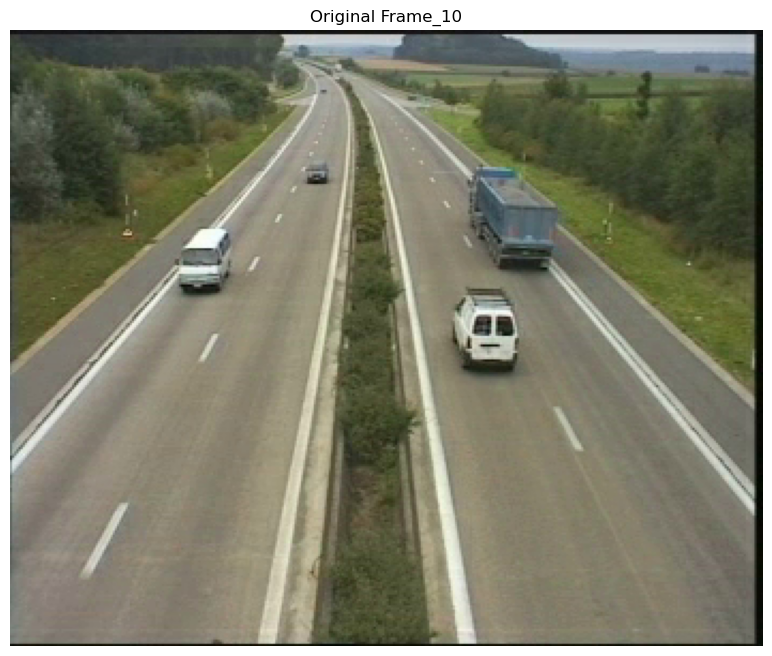

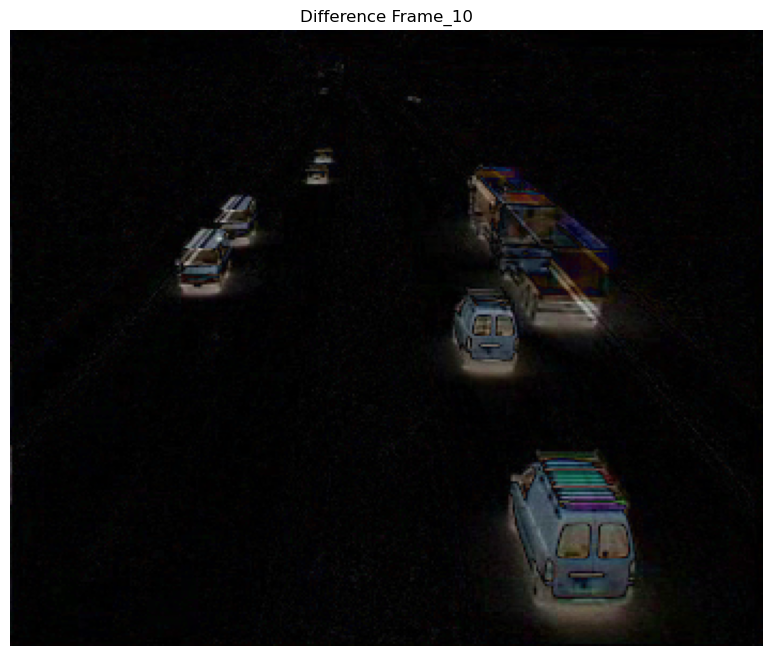

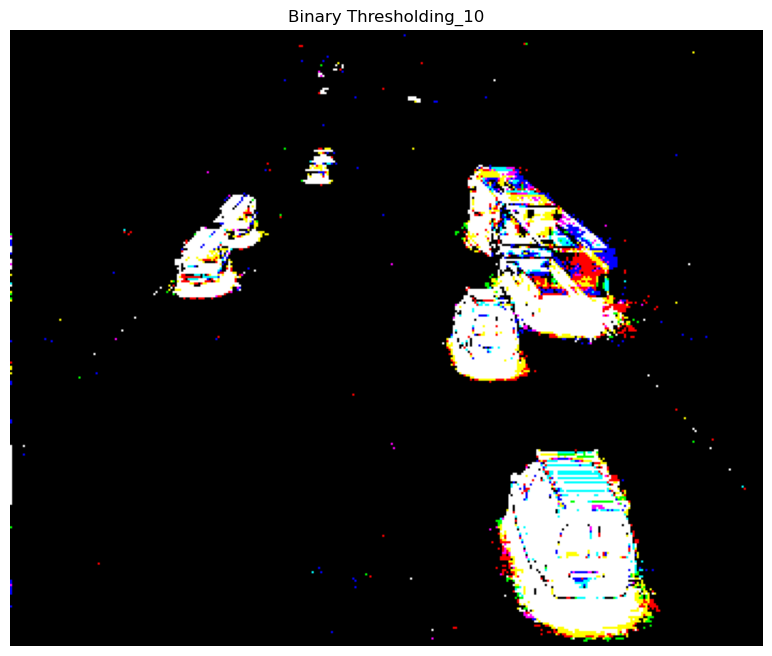

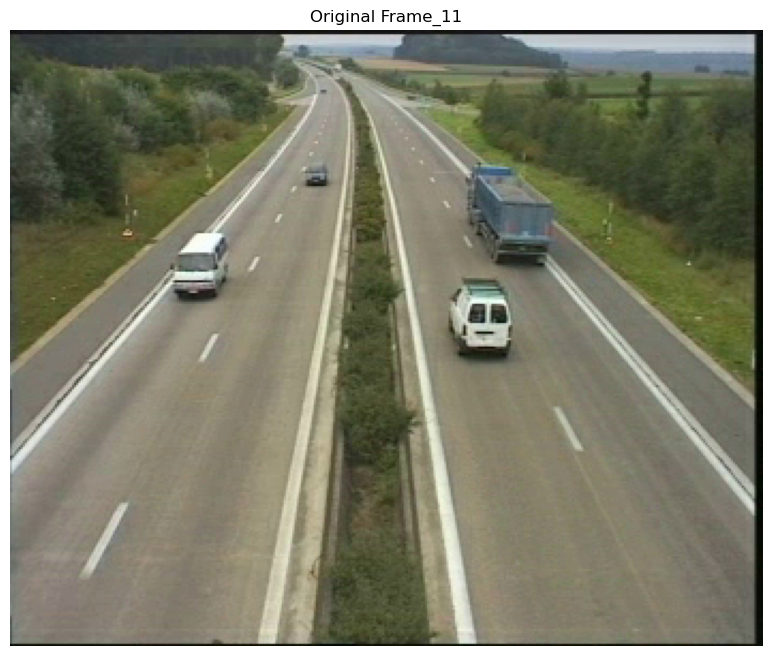

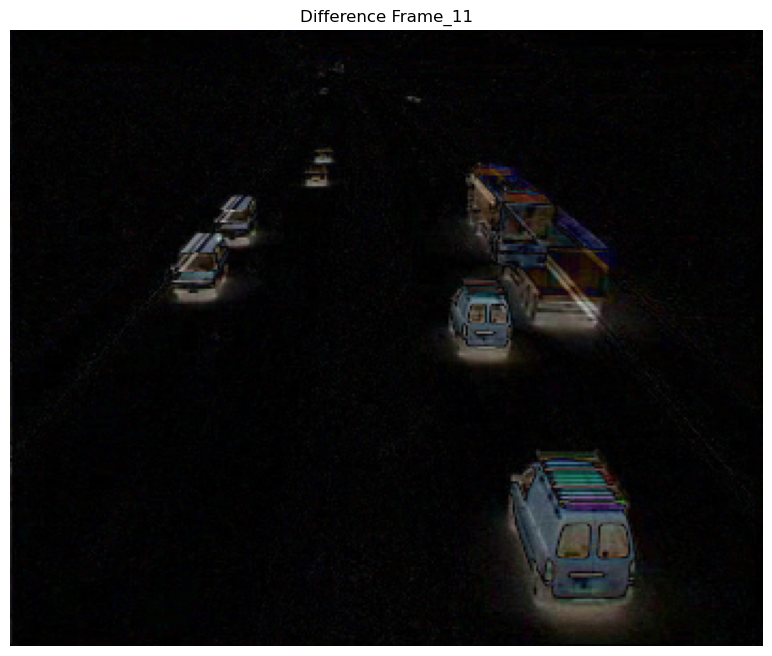

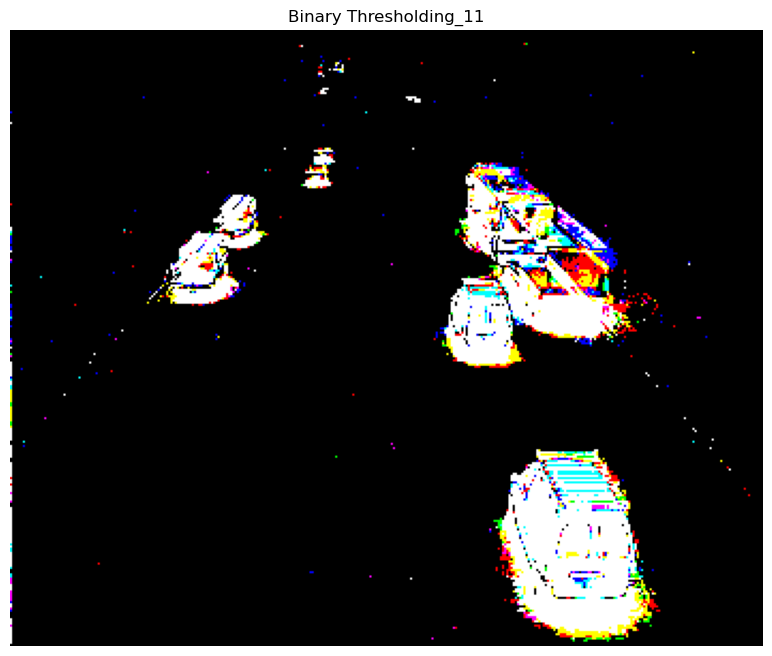

In [1]:
!pip install imageio[ffmpeg]
!pip install imageio[pyav]

import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt

#function which captures pixel by pixel frame differnce w.r.t  a reference frame
def ICV_frame_difference(reference_frame, current_frame):
    # check if  the frames have the same shape
    assert reference_frame.shape == current_frame.shape, "Frames must have the same shape"

    # calculate absolute pixel-wise difference
    # measure of how much the pixel values at each corresponding position differ between the two frames.
    diff_frame = np.abs(reference_frame.astype(int) - current_frame.astype(int)).astype(np.uint8)
    return diff_frame
    

# to load the video frames into a list named frames
frames = []

# use the video DatasetC
video_path = 'DatasetC.avi'
video = imageio.get_reader(video_path)

# load frames from the video
for frame_number, frame in enumerate(video):
    frames.append(frame)
    
#take first frame as reference_frame and save it   
reference_frame = video.get_data(0)
frame_image = Image.fromarray(reference_frame)
frame_image_path = 'q5frame_reference_frameas_first_frame.jpg'
frame_image.save(frame_image_path)

# close the video reader
video.close()

#use a threshold value for classification, looked at the histogram for diff frame, and identifies where the intensity peak changes
threshold_value = 20

# iterate through frames and compute differences w.r.t reference_frame
for i in range(1, len(frames)):
    #current frame
    current_frame = frames[i]

    # calculate frame difference w.r.t reference_frame
    diff_frame = ICV_frame_difference(reference_frame, current_frame)
    # Calculate the histogram for identifying the right threshold
    hist, bins = np.histogram(diff_frame.flatten(), bins=256, range=[0,256])
    
    # apply binary thresholding, if its greater 
    binary_frame = (diff_frame > threshold_value).astype(np.uint8) * 255
    #the below code displays only specified frames
    if i==10 or i==11:
        '''
        # Plot the histogram
        plt.figure(figsize=(10, 8))
        plt.plot(hist, color='black')
        plt.title('Histogram of Difference Frame_'+str(i))
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()
        '''
        #displya and save original frame
        frame_image = Image.fromarray(current_frame)
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_image, cmap='gray')
        plt.savefig('q5frame original_'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Original Frame_'+str(i))
        plt.axis('off')
        plt.show()
        
        # visualize the difference frame and the binary result
        plt.figure(figsize=(10, 8))
        plt.imshow(diff_frame, cmap='gray')
        plt.savefig('q5frame diff'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Difference Frame_'+str(i))
        plt.axis('off')
        plt.show()
        plt.figure(figsize=(10, 8))
        plt.imshow(binary_frame, cmap='gray')
        plt.savefig('q5frame binarythresholding'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Binary Thresholding_'+str(i))
        plt.axis('off')
        plt.show()



b) Repeat the exercise using the previous frame as reference frame (use frame It-1 as reference frame
for frame It, for each t). Comment the results in the report.

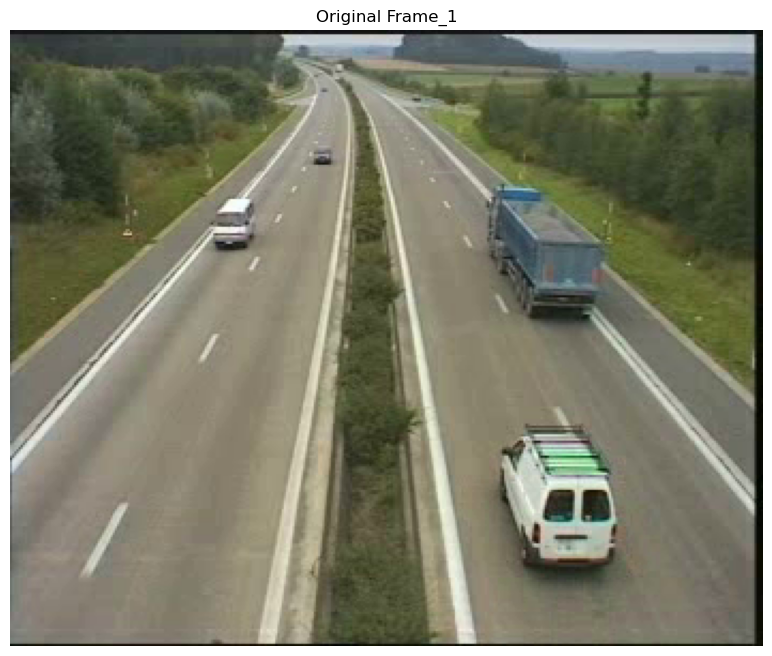

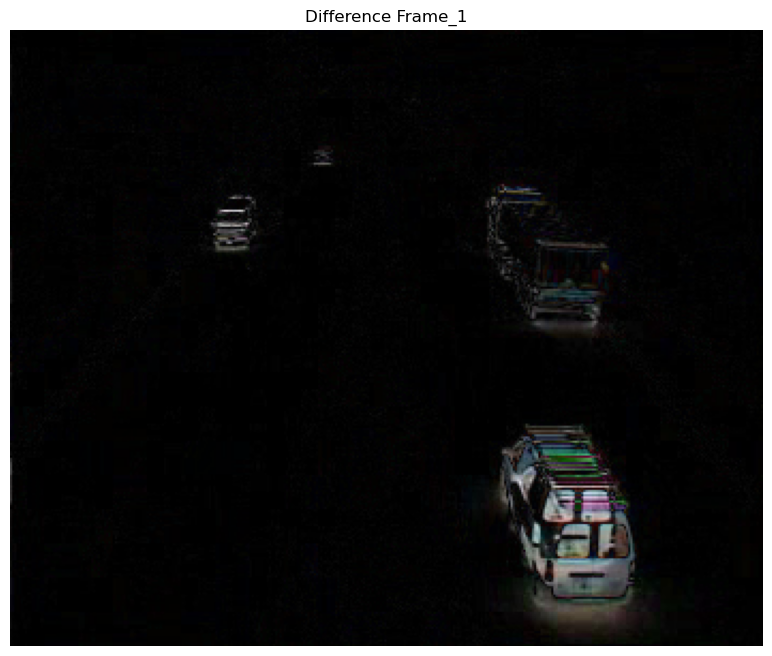

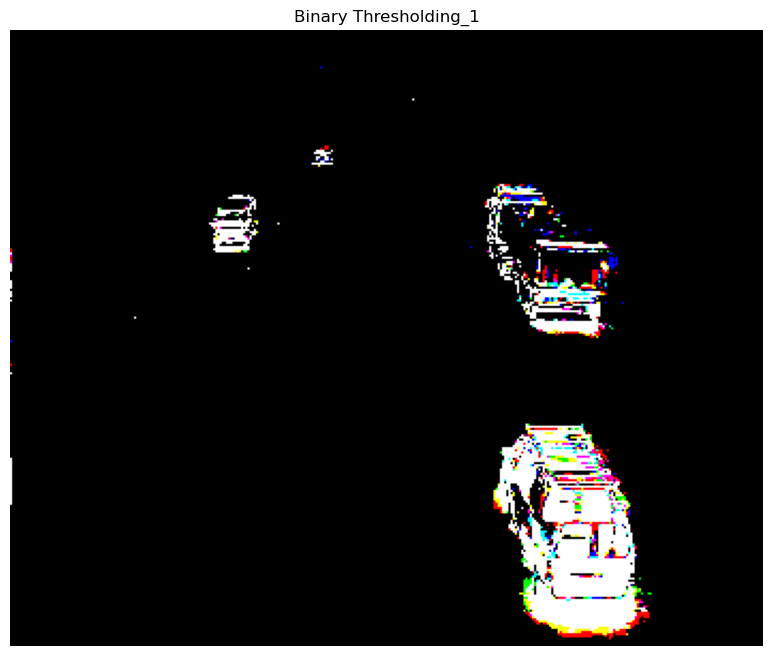

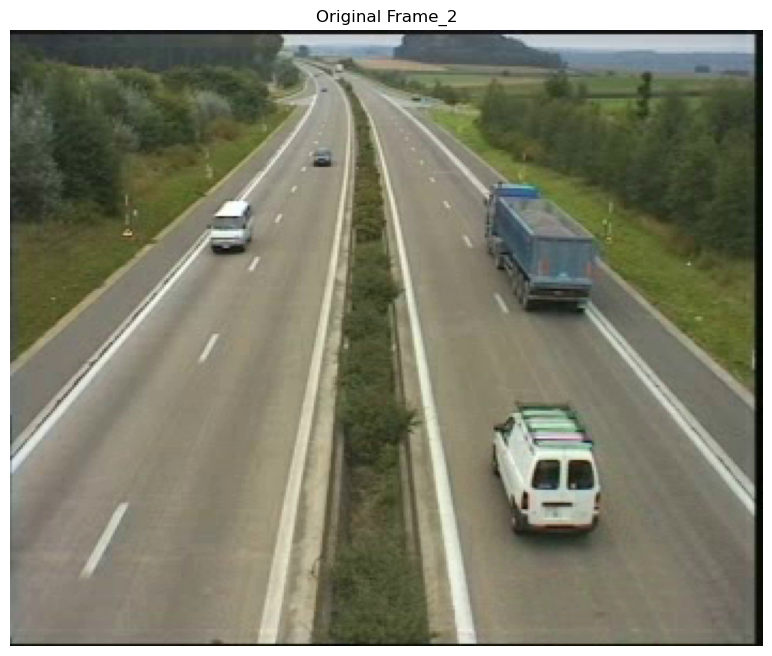

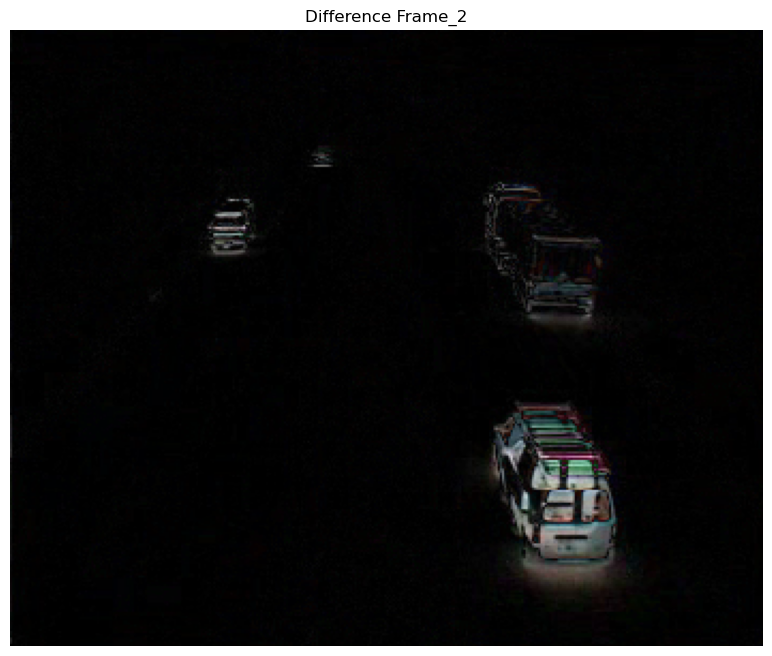

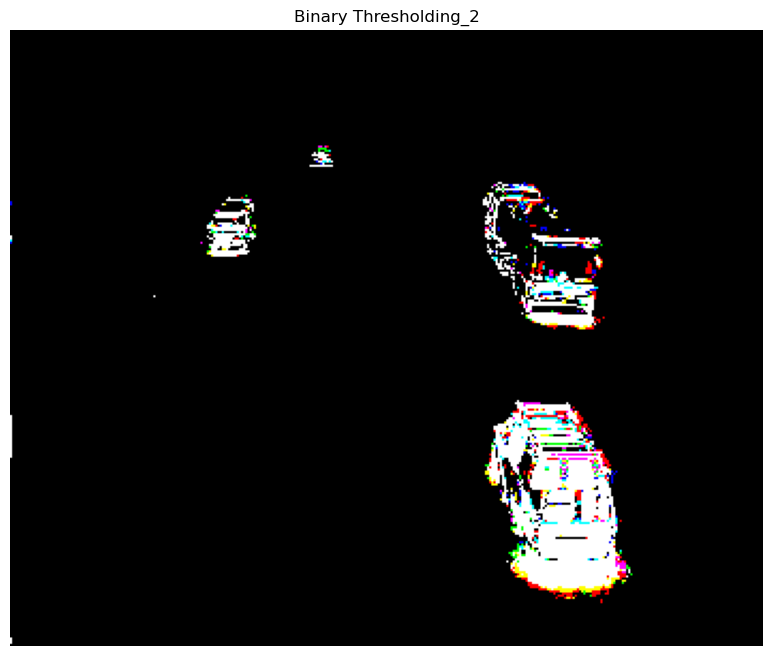

In [2]:
import numpy as np
import imageio
from PIL import Image


# to load the video frames into a list named frames
frames = []

# use the video DatasetC
video_path = 'DatasetC.avi'
video = imageio.get_reader(video_path)

# load frames from the video
for frame_number, frame in enumerate(video):
    frames.append(frame)
    
#take first frame as reference_frame 
reference_frame = video.get_data(0)

# close the video reader
video.close()

#use a threshold value for classification, looked at the histogram for diff frame, and identifies where the intensity peak changes
threshold_value = 20

# iterate through frames and compute differences w.r.t reference_frame
#iterate from the second frame
for i in range(1, len(frames)):
    #select next reference_frame as the previous frame
    reference_frame = frames[i - 1]
    #current frame
    current_frame = frames[i]
    
    # calculate frame difference w.r.t reference_frame
    diff_frame = ICV_frame_difference(reference_frame, current_frame)
    # calculate the histogram for threshold identification purpose
    hist, bins = np.histogram(diff_frame.flatten(), bins=256, range=[0,256])
    
    # apply binary thresholding, if its greater 
    binary_frame = (diff_frame > threshold_value).astype(np.uint8) * 255
    
    #the below code display only specified frames
    if i==1 or i==2:
        '''
        # Plot the histogram
        plt.figure(figsize=(10, 8))
        plt.plot(hist, color='black')
        plt.title('Histogram of Difference Frame_'+str(i))
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()
        '''
        #for original image
        frame_image = Image.fromarray(current_frame)
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_image, cmap='gray')
        plt.savefig('q5frame original_'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Original Frame_'+str(i))
        plt.axis('off') 
        plt.show()
        
        # visualize the difference frame and the binary result
        plt.figure(figsize=(10, 8))
        plt.imshow(diff_frame, cmap='gray')
        plt.savefig('q5frame diff'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Difference Frame_'+str(i))
        plt.axis('off') 
        plt.show()
        plt.figure(figsize=(10, 8))
        plt.imshow(binary_frame, cmap='gray')
        plt.savefig('q5frame binarythresholding'+str(i)+'.jpg', bbox_inches='tight', pad_inches=0)
        plt.title('Binary Thresholding_'+str(i))
        plt.axis('off')
        plt.show()

c) Write a function that generates a reference frame (background) for the sequence using for example
frame differencing and a weighted temporal averaging algorithm.

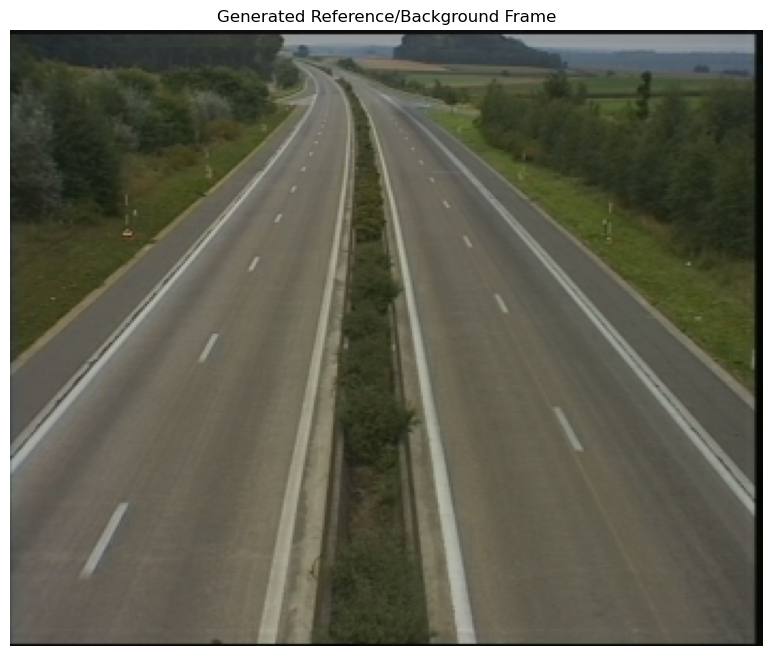

In [3]:
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt

#function generates background frame using frame differencing and a weighted temporal averaging algorithm.
def ICV_generate_reference_frame(frames, alpha=0.01, threshold_value=20):
    #parameter alpha for the balance between the historical information (accumulated over time) and the new 
    #information from the current frame. If alpha is close to 1, the historical information has more influence, making the
    # accumulated reference frame change more slowly. If alpha is close to 0, the current frame has more influence, allowing 
    # the accumulated reference frame to adapt quickly to changes.
    accumulated_reference_frame = np.zeros_like(frames[0], dtype=np.float32)

    # iterate through frames and compute differences w.r.t reference_frame
    # iterate from second frame
    for i in range(1, len(frames)):
        #select next reference_frame as the previous frame
        reference_frame = frames[i - 1]
        # Current frame
        current_frame = frames[i]
        # calculate frame difference w.r.t reference_frame
        diff_frame = np.abs(reference_frame.astype(int) - current_frame.astype(int)).astype(np.uint8)
        # calculate the histogram to identify correct threshold
        hist, bins = np.histogram(diff_frame.flatten(), bins=256, range=[0, 256])
        
        # apply binary thresholding, if it's greater
        binary_frame = (diff_frame > threshold_value).astype(np.uint8) * 255
        # update the reference frame using weighted temporal averaging
        #alpha determines the weight, and (1 - alpha) is the weight assigned to the historical accumulated reference frame.
        accumulated_reference_frame = alpha * current_frame.astype(np.float32) + (1 - alpha) * accumulated_reference_frame

    return accumulated_reference_frame.astype(np.uint8)

# load the video frames into a list frames
frames = []
video_path = 'DatasetC.avi'
video = imageio.get_reader(video_path)

for frame_number, frame in enumerate(video):
    frames.append(frame)

#  the first frame as the reference_frame
reference_frame = frames[0]

# close the reader
video.close()

# generate the reference frame using the function
generated_reference_frame = ICV_generate_reference_frame(frames)

# plot  final generated reference frame
plt.figure(figsize=(10, 8))
plt.imshow(generated_reference_frame, cmap='gray')
plt.title('Generated Reference/Background Frame')
plt.axis('off')
plt.savefig('q5_Generated_Reference_Frame.jpg')
plt.show()


d) Write a function that counts the number of moving objects in each frame of a sequence. Generate a
bar plot that visualizes the number of objects for each frame of the whole sequence. Discuss in the
report the implemented solution, including advantages and disadvantages.

Frame 0 Number of moving objectcs 5
Frame 1 Number of moving objectcs 8
Frame 2 Number of moving objectcs 9
Frame 3 Number of moving objectcs 6
Frame 4 Number of moving objectcs 5
Frame 5 Number of moving objectcs 6
Frame 6 Number of moving objectcs 4
Frame 7 Number of moving objectcs 6
Frame 8 Number of moving objectcs 6
Frame 9 Number of moving objectcs 8
Frame 10 Number of moving objectcs 7
Frame 11 Number of moving objectcs 4
Frame 12 Number of moving objectcs 5
Frame 13 Number of moving objectcs 3
Frame 14 Number of moving objectcs 5
Frame 15 Number of moving objectcs 7
Frame 16 Number of moving objectcs 3
Frame 17 Number of moving objectcs 5
Frame 18 Number of moving objectcs 8
Frame 19 Number of moving objectcs 11
Frame 20 Number of moving objectcs 6
Frame 21 Number of moving objectcs 6
Frame 22 Number of moving objectcs 5
Frame 23 Number of moving objectcs 6
Frame 24 Number of moving objectcs 6
Frame 25 Number of moving objectcs 5
Frame 26 Number of moving objectcs 6
Frame 27 N

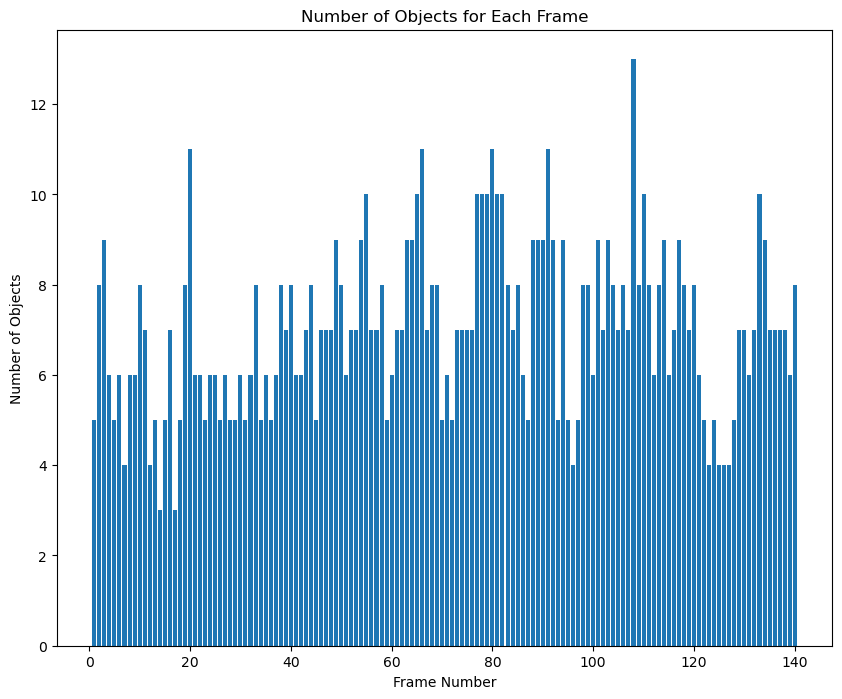

In [4]:
import matplotlib.pyplot as plt
from scipy import ndimage

from scipy import ndimage
import numpy as np


# function to perform connected component labeling
#Since stack is being used , it takes more time complexity
def ICV_label_connected_components(binary_mask):
    # initialize an array to store the labeled components
    labeled_frame = np.zeros_like(binary_mask)
    # start labeling from 1
    label = 1

    # iterate through each pixel in the binary mask
    for i in range(binary_mask.shape[0]):
        for j in range(binary_mask.shape[1]):
            # use np.all() to check if all elements in the boolean array are True
            # check if the pixel is part of the foreground and not labeled
            if np.all(np.array([binary_mask[i, j] == 255, labeled_frame[i, j] == 0])):
                # if the pixel is part of the foreground and not labeled, initialize a stack with the current pixel
                stack = [(i, j)]

                # use a stack-based approach to label connected components
                while stack:
                    # pop a pixel from the stack
                    x, y = stack.pop()
                    # label the current pixel
                    labeled_frame[x, y] = label

                    # check neighbors (top, bottom, left, right)
                    neighbors = [
                        (x - 1, y),
                        (x + 1, y),
                        (x, y - 1),
                        (x, y + 1)
                    ]

                    # iterate through neighbors
                    for nx, ny in neighbors:
                        # check if the neighbor is within the image bounds and is part of the foreground and not labeled
                        if 0 <= nx < binary_mask.shape[0] and 0 <= ny < binary_mask.shape[1] and \
                           np.all(np.array([binary_mask[nx, ny] == 255, labeled_frame[nx, ny] == 0])):
                            # add the neighbor to the stack for further processing
                            stack.append((nx, ny))

                # move to the next label for the next connected component
                label += 1

    # calculate the total number of labeled objects (subtract 1 because labeling started from 1)
    num_objects = label - 1
    
    return labeled_frame, num_objects



# to load the video frames into a list named frames
frames = []

# use the video DatasetC
video_path = 'DatasetC.avi'
video = imageio.get_reader(video_path)

# load frames from the video
for frame_number, frame in enumerate(video):
    frames.append(frame)
    
#take first frame as reference_frame and save it   
reference_frame = video.get_data(0)

# close the video reader
video.close()

#use a threshold value for classification, looked at the histogram for diff frame and identifies where the intensity peak changes
threshold_value = 20
# Lists to store the number of objects for each frame
num_objects_list = []
# iterate through frames and compute differences w.r.t reference_frame
#using accumulated_reference_frame from the previous run which has a background image generated
# generate the reference frame using the function
accumulated_reference_frame = ICV_generate_reference_frame(frames)
accumulated_reference_frame = np.zeros_like(accumulated_reference_frame, dtype=np.float32)
# set reference_frame as the accumulated_reference_frame as we compare the frames w.r.t to this
reference_frame = accumulated_reference_frame

for i in range(0, len(frames)):
    #current frame
    current_frame = frames[i]
    # calculate frame difference w.r.t reference_frame accumulated_reference_frame
    diff_frame = ICV_frame_difference(reference_frame, current_frame)

    # calculate the histogram to identify correct threshold
    hist, bins = np.histogram(diff_frame.flatten(), bins=256, range=[0,256])
    # apply binary thresholding, 
    binary_frame = (diff_frame > threshold_value).astype(np.uint8) * 255
    #findout the number of moving objects based the differnce binary frame
    labeled_frame, num_objects = ndimage.label(binary_frame)
    #labeled_frame, num_objects = ICV_label_connected_components(binary_frame)
    print('Frame {} Number of moving objectcs {}'.format(i,num_objects))
    num_objects_list.append(num_objects)
    '''
    if i<10:
        # Plot the histogram
        plt.figure(figsize=(10, 5))
        plt.plot(hist, color='black')
        plt.title('Histogram of Difference Frame_'+str(i))
        plt.xlabel('Pixel Intensity diff')
        plt.ylabel('Frequency')
        plt.show()
    '''
        
#  bar plot for Number of Objects for Each Frame
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(num_objects_list) + 1), num_objects_list)
plt.xlabel('Frame Number')
plt.ylabel('Number of Objects')
plt.title('Number of Objects for Each Frame')
plt.savefig('q5_BarPlot_Num_Moving_Objects_InFrames.jpg')
plt.show()
